In [20]:
import pandas as pd

In [21]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(30)

,id,nutrisi,ph,aksi
0,9046,90,7.0,larutan a & b dimasukkan
1,51676,100,6.0,larutan ph up dimasukkan
2,31112,100,8.0,larutan ph down dimasukkan
3,60182,95,7.0,larutan a & b dimasukkan
4,1665,90,7.0,larutan a & b dimasukkan
5,56669,92,7.0,larutan a & b dimasukkan
6,53882,80,7.0,larutan a & b dimasukkan
7,10434,70,7.0,larutan a & b dimasukkan
8,27419,100,6.5,larutan ph up dimasukkan
9,60491,100,6.9,larutan ph up dimasukkan


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
enc = LabelEncoder()

In [24]:
data['nutrisi'] = enc.fit_transform(data['nutrisi'].values)
data['ph'] = enc.fit_transform(data['ph'].values)


In [37]:
data.head()

,id,nutrisi,ph,aksi
0,9046,3,6,larutan a & b dimasukkan
1,51676,10,2,larutan ph up dimasukkan
2,31112,10,10,larutan ph down dimasukkan
3,60182,5,6,larutan a & b dimasukkan
4,1665,3,6,larutan a & b dimasukkan


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
id         29 non-null int64
nutrisi    29 non-null int64
ph         29 non-null int64
aksi       29 non-null object
dtypes: int64(3), object(1)
memory usage: 1.0+ KB


In [27]:
cls_data = data['aksi']
cls_data.head()

0      larutan a & b dimasukkan
1      larutan ph up dimasukkan
2    larutan ph down dimasukkan
3      larutan a & b dimasukkan
4      larutan a & b dimasukkan
Name: aksi, dtype: object

In [28]:
atr_data=data.drop(columns='aksi')
atr_data.head()

,id,nutrisi,ph
0,9046,3,6
1,51676,10,2
2,31112,10,10
3,60182,5,6
4,1665,3,6


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(atr_data, cls_data, test_size=0.2, random_state=500)
tree_data = DecisionTreeClassifier(random_state=500)
tree_data.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=500)

In [35]:
print("Nilai akurasi pada data testing", tree_data.score(xtest, ytest))

Nilai akurasi pada data testing 1.0


In [38]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file="tree_stroke.dot", class_names=["larutan a & b dimasukkan", "larutan ph up dimasukkan", "larutan ph down dimasukkan", "larutan a, b, & ph down dimasukkan", "larutan a, b, & ph up dimasukkan"], feature_names=atr_data.columns,
impurity=False, filled=True)

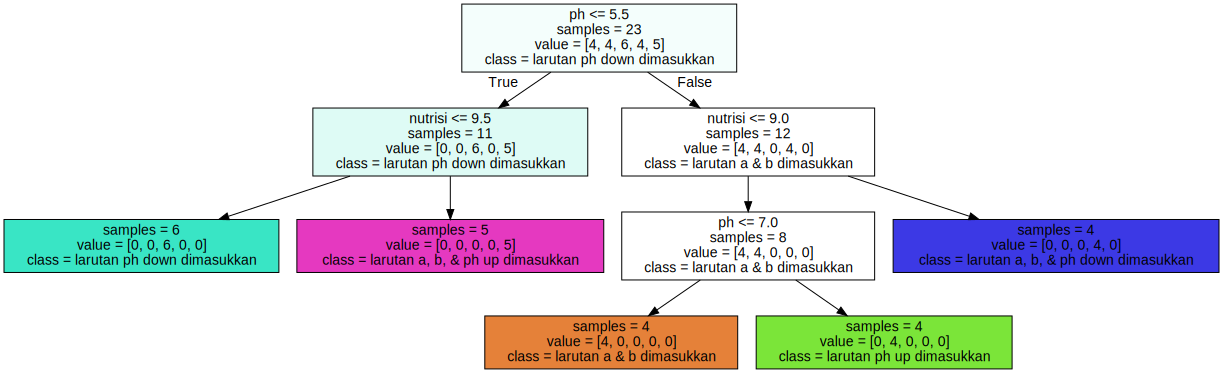

In [39]:
import graphviz
with open("tree_stroke.dot") as fig:
    dot_graph = fig.read()
graphviz.Source(dot_graph)